In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df = df.drop(columns = ["User ID"])
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Gender'].unique()

array([1, 0])

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


<Axes: >

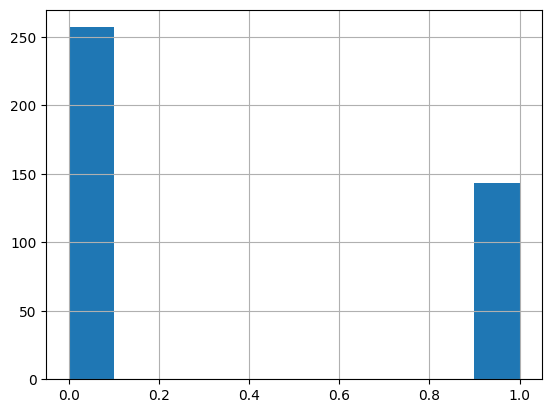

In [ ]:
df['Purchased'].hist()

<Axes: >

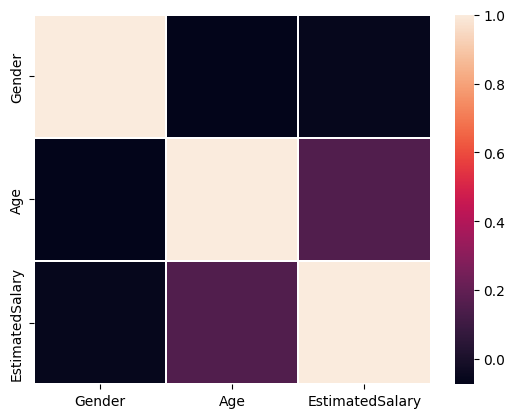

In [ ]:
corr = df.iloc[:, :-1].corr(method = "pearson")
sns.heatmap(corr, linewidths = 0.2)

In [ ]:
X = df.iloc[:, :-1]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
Y = df.iloc[:, -1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
print(Y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

print("Confusion matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("F1 score =", f1_score(Y_test, Y_pred))

Confusion matrix:
[[61  2]
 [ 6 31]]
F1 score = 0.8857142857142858
